In [106]:
import importlib
import loading_helper
importlib.reload(loading_helper)
import plot_helper
importlib.reload(plot_helper)
import compute_helper
importlib.reload(compute_helper)
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt


In [107]:
A, B, Q, R, S = compute_helper.contruct_matrices(dim=20)
x0 = jnp.array([
    1, -2,  0,  2,
    -1,  2, -2,  2,
    0, -2,  1, -1,
    2,  0,  2, -2,
    2, -2,  1,  0
    ], dtype=jnp.float32)

Shapes -> A: (20, 20) B: (20, 10) Q: (20, 20) R: (10, 10) S: (20, 10)
R SPD?: True
Popov (Q - S R^{-1} S^T) >= 0 ? True


In [75]:
run_dir_MTPINN = "runs/20D/MT-PINN"
run_dir_PINN = "runs/20D/PINN"

model_MTPINN, _, cfg, _ = loading_helper.load_model_and_history(run_dir_MTPINN, tag="MT-PINN_LQR")
model_PINN, _, cfg, _ = loading_helper.load_model_and_history(run_dir_PINN, tag="PINN_LQR") 

T       = float(cfg.T)
x_ranges = tuple(getattr(cfg, "x_ranges", [(-2, 2)] * 20))
t_eval = np.linspace(0.0, T-1e-8, 200)

models = {"MTPINN": model_MTPINN, "PINN": model_PINN}


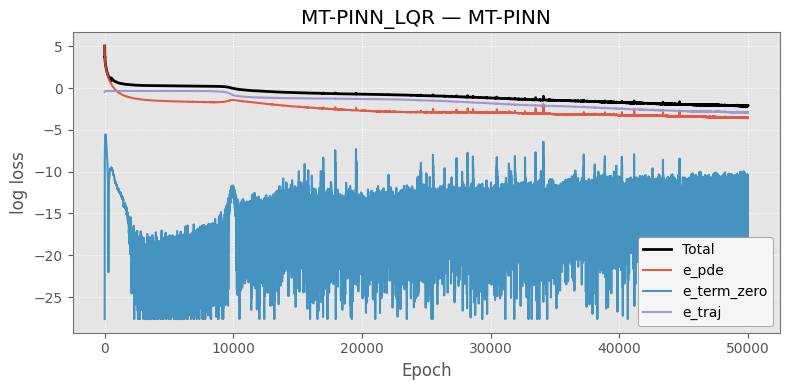

In [76]:
plot_helper.plot_history_from_dir(run_dir_MTPINN, tag="MT-PINN_LQR",
                      preferred_metric_keys=["e_pde","e_term_zero", "e_traj"])

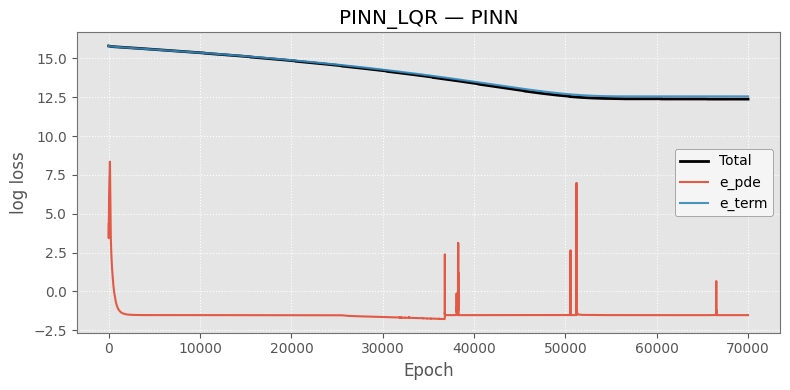

In [77]:
plot_helper.plot_history_from_dir(run_dir_PINN, tag="PINN_LQR",
                      preferred_metric_keys=["e_pde","e_term"])

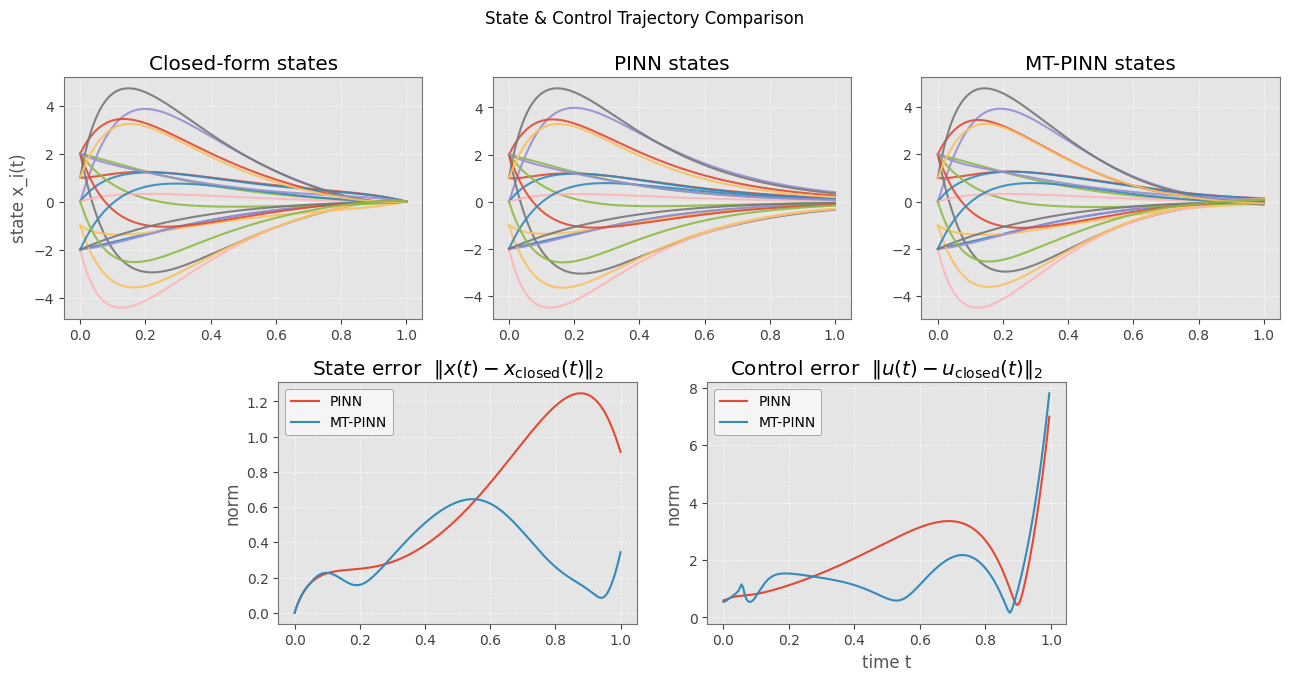

[PINN] state  stats: {'max': 1.2462807903722948, 't_at_max': 0.8793969761306533, 'rms': np.float64(0.7434899712886519), 'auc': np.float64(0.6348985891527387), 'final': 0.9131642355116548, 'relL2': 0.11496945645409554}
[PINN] control stats: {'max': nan, 't_at_max': 0.99999999, 'rms': np.float64(nan), 'auc': np.float64(nan), 'final': nan, 'relL2': nan}
[MT-PINN] state  stats: {'max': 0.6449980734442231, 't_at_max': 0.5477386879899497, 'rms': np.float64(0.3915387878396097), 'auc': np.float64(0.3449473542626992), 'final': 0.34384250585226456, 'relL2': 0.060601525645694015}
[MT-PINN] control stats: {'max': nan, 't_at_max': 0.99999999, 'rms': np.float64(nan), 'auc': np.float64(nan), 'final': nan, 'relL2': nan}


In [94]:
plot_helper.comparsion_plot(models, x0, T, t_eval, A, B, Q, R, S, Ndt=200)

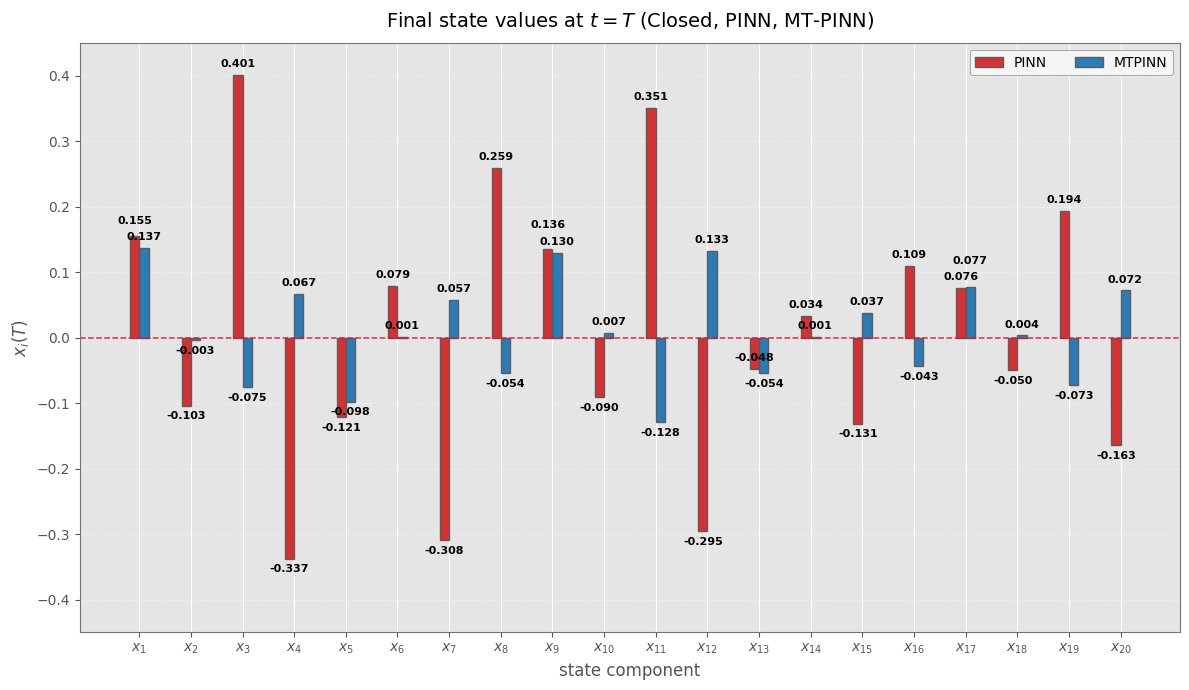

[PINN] mean|x(T)|=0.172, std|x(T)|=0.11, ||x(T)||2=0.9132, max|x_i(T)|=0.4014 at i=3
[MTPINN] mean|x(T)|=0.06253, std|x(T)|=0.04473, ||x(T)||2=0.3438, max|x_i(T)|=0.1367 at i=1


In [102]:
plot_helper.inventory_comparison_plot(models, x0, T, t_eval, A, B, Q, R, S, Ndt=200)

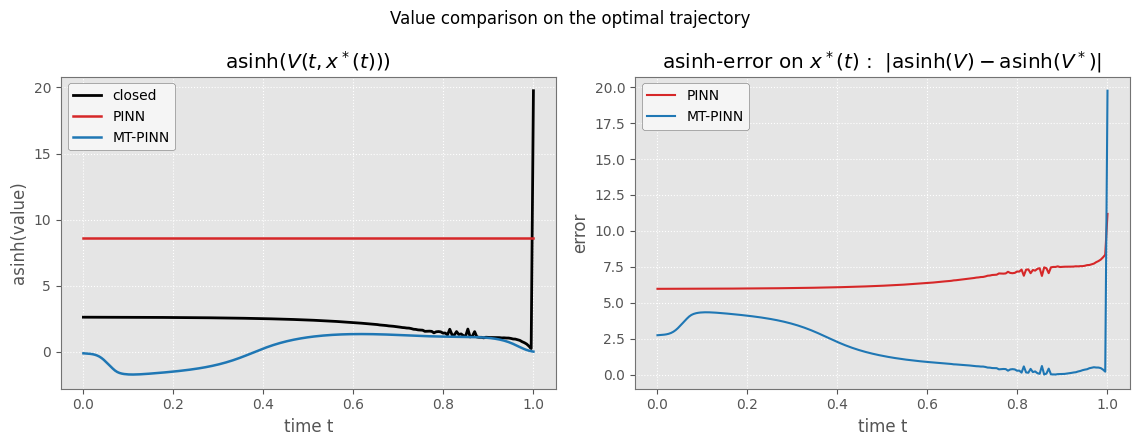

=== asinh-error stats over t on x*(t) ===
PINN    {'MAE': 6.5015289214854315, 'RMSE': 6.5368892349557015, 'Max': 11.18236276582185}
MT-PINN {'MAE': 1.9878245862645934, 'RMSE': 2.802901637926126, 'Max': 19.753470731275407}


In [105]:
plot_helper.value_comparison(models, x0, T, t_eval, A, B, Q, R, S, use_tau_input=True)